In [ ]:
#Creating dataset
import pandas as pd
import random
from datetime import datetime,timedelta
#generate data
rows=365
start_date=datetime(2024,5,1)
data={
    'Date':[(start_date+timedelta(days=i)).strftime('%Y-%m-%d')for i in range(rows)],
    'City':random.choices(['Hyderabad','Banglore','Mumbai','Ahmedabad','Chennai','Kolkata'],k=rows),
    'Demand':[random.randint(1000,10000)for _ in range(rows)],
    'Weather condition':random.choices(['Sunny','Windy','Rainy','Cloudy'],k=rows),
    'Day of week':[(start_date+timedelta(days=i)).strftime('%A')for i in range(rows)],
}
#create df
df=pd.DataFrame(data)#coverting into a file
#save csv
file_name='uber_demand_data.csv'
df.to_csv(file_name,index=False)#coverting the file into csv file
# download the file from google colab
from google.colab import files
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# load the dataset
file_name='uber_demand_data.csv'
df=pd.read_csv(file_name)
print("Dataset Overview:")
print(df.head())
print("\nDataset Information:")
df.info()

Dataset Overview:
         Date       City  Demand Weather condition Day of week
0  2024-05-01    Chennai    9537             Windy   Wednesday
1  2024-05-02   Banglore    2099            Cloudy    Thursday
2  2024-05-03  Ahmedabad    4943            Cloudy      Friday
3  2024-05-04    Chennai    7537             Sunny    Saturday
4  2024-05-05    Kolkata    1475             Windy      Sunday

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               365 non-null    object
 1   City               365 non-null    object
 2   Demand             365 non-null    int64 
 3   Weather condition  365 non-null    object
 4   Day of week        365 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.4+ KB


In [ ]:
#Check for missing values
print('\nMissing values:')
print(df.isnull().sum())
df['Date']=pd.to_datetime(df['Date'])
city_data=df[df['City']=='Ahmedabad'].copy()
city_data.set_index('Date',inplace=True)
print('\nFiltered Data sample:')
print(city_data.head())


Missing values:
Date                 0
City                 0
Demand               0
Weather condition    0
Day of week          0
dtype: int64

Filtered Data sample:
                 City  Demand Weather condition Day of week
Date                                                       
2024-05-03  Ahmedabad    4943            Cloudy      Friday
2024-05-06  Ahmedabad    3063            Cloudy      Monday
2024-05-08  Ahmedabad    2404             Rainy   Wednesday
2024-05-15  Ahmedabad    6786             Sunny   Wednesday
2024-05-17  Ahmedabad    4254             Rainy      Friday


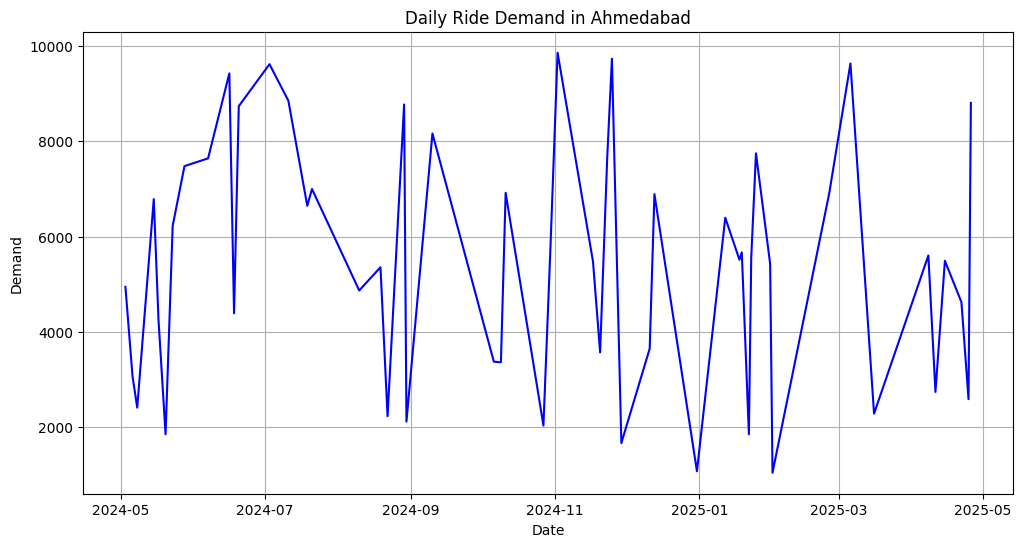

In [ ]:
#plot the time series
plt.figure(figsize=(12,6))
plt.plot(city_data['Demand'],color='blue')
plt.title('Daily Ride Demand in Ahmedabad')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.grid()
plt.show()

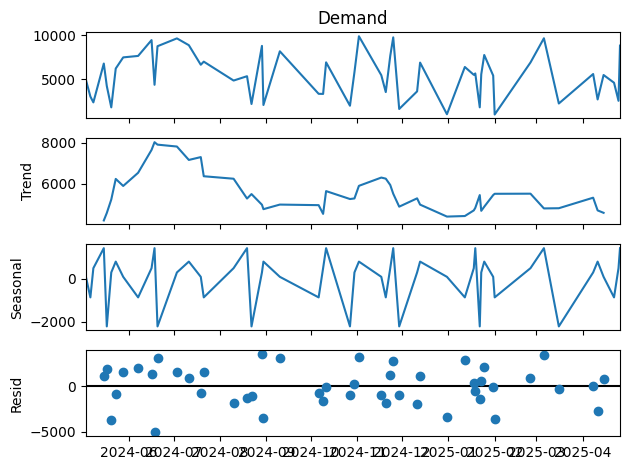

In [ ]:
#decompose time series
decomposition=seasonal_decompose(city_data['Demand'],model='additive',period=7)
decomposition.plot()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

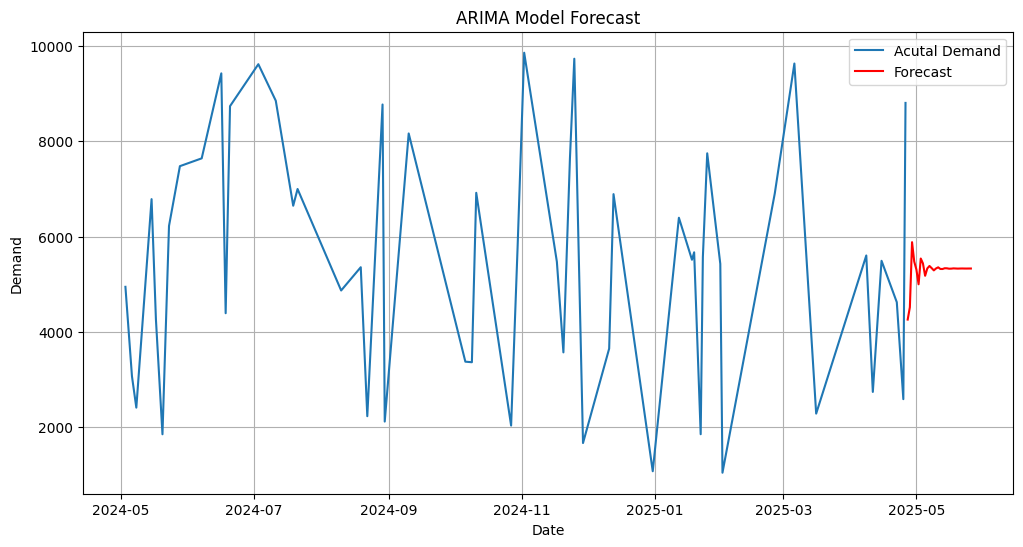

In [ ]:
#fit an ARIMA model
model=ARIMA(city_data['Demand'],order=(5,1,0))
arima_model=model.fit()
forecast=arima_model.forecast(steps=30)
plt.figure(figsize=(12,6))
plt.plot(city_data['Demand'],label='Acutal Demand')
plt.plot(pd.date_range(city_data.index[-1]+pd.Timedelta(days=1),periods=30),forecast,label='Forecast',color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
arima_predictions=arima_model.predict(start=0,end=len(city_data)-1)
arima_mae=mean_absolute_error(city_data['Demand'],arima_predictions)
arima_rmse=np.sqrt(mean_squared_error(city_data['Demand'],arima_predictions))
print(f"ARIMA Model - MAE:{arima_mae:.2f},RMSE:{arima_rmse:.2f}")

ARIMA Model - MAE:2241.93,RMSE:2645.14


In [ ]:
#save ARIMA
import joblib
arima_model_filename='uber_demand_arima_model.pkl'
joblib.dump(arima_model,arima_model_filename)
print(f"ARIMA model saved as {arima_model_filename}")

ARIMA model saved as uber_demand_arima_model.pkl


# **INTRODUCING** **DEEP** **LEARNING**

In [ ]:

# Import necessary libraries for Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv('uber_demand_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Feature Scaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['Demand']])

# Prepare data for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Using past 30 days' data to predict demand
X, y = create_sequences(df_scaled, seq_length)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Forecast next 7 days
future_inputs = df_scaled[-seq_length:]
future_inputs = future_inputs.reshape(1, seq_length, 1)
predicted_demand = model.predict(future_inputs)
predicted_demand = scaler.inverse_transform(predicted_demand)

print(f"Predicted Uber Demand for Next 7 Days: {predicted_demand}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.2388 - val_loss: 0.0937
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0912 - val_loss: 0.0827
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1020 - val_loss: 0.0797
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0942 - val_loss: 0.0758
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1061 - val_loss: 0.0747
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0923 - val_loss: 0.0807
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0973 - val_loss: 0.0793
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1051 - val_loss: 0.0748
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0942 - val_loss: 0.0820
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0992 - val_loss: 0.0746
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1015 - val_loss: 0.0764
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.1

In [ ]:

# Apache Spark for Big Data Processing
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg

# Initialize Spark
spark = SparkSession.builder.appName('UberDemandAnalysis').getOrCreate()
df_spark = spark.read.csv('uber_demand_data.csv', header=True, inferSchema=True)
# Calculate average demand per city
df_spark.groupBy('City').agg(avg(col('Demand')).alias('Avg_Demand')).show()


+---------+-----------------+
|     City|       Avg_Demand|
+---------+-----------------+
|  Chennai|         5536.375|
|   Mumbai|5434.833333333333|
|Ahmedabad|5465.830188679245|
|  Kolkata|5572.584615384615|
| Banglore|4842.559322033899|
|Hyderabad|         5919.375|
+---------+-----------------+



In [ ]:
import plotly.express as px
import pandas as pd

# Load data
df = pd.read_csv('uber_demand_data.csv')

# Choose a city for visualization
city = 'Hyderabad'  # Change as needed
filtered_data = df[df['City'] == city]

# Create interactive line chart
fig = px.line(filtered_data, x="Date", y="Demand", title=f"Uber Demand Trends in {city}")

# Show the interactive plot
fig.show()
